# Generador de Material Educativo Personalizado mediante IA

## Desafíos y Problemática en la Preparación de Recursos Educativos

### Problema
La creación de materiales educativos atractivos y adaptados es un desafío para los docentes. Requiere mucho tiempo y creatividad, y a menudo los recursos resultantes no logran captar el interés de los estudiantes.

### Solución Propuesta
Utilizar **plantillas de prompts reutilizables** para aprovechar la inteligencia artificial generativa. Esto nos permitirá crear explicaciones y actividades de repaso claras, concisas y personalizadas de manera rápida y eficiente.

### La viabilidad técnica del proyecto se sustenta en los siguientes puntos

- La generación de explicaciones y ejercicios es una de las principales capacidades de los modelos de texto. 
- La creación de imágenes educativas con prompts bien diseñados es factible y se puede adaptar en estilo infantil. 
- Los recursos necesarios son mínimos: conexión a internet y acceso a los modelos de IA gratuitos trabajados en el curso. 
- El tiempo requerido para preparar ejemplos de prompts y probarlos es razonable, ya que se puede trabajar tema por tema.

### Objetivos

- Reducir el tiempo que los docentes dedican a preparar materiales educativos mediante la generación automática de explicaciones y ejercicios.
- Mejorar la claridad y atractivo de los recursos educativos.
- Generar ejemplos y actividades que motiven al estudiante.

### Metodología

1. Seleccionar un tema educativo específico.
2. Crear prompts optimizados e implementar técnicas como Fast Prompting y One-shot para generar explicaciones, ejercicios o imágenes.
   
- Los prompts optimizados y técnicas como Fast Prompting aseguran que el contenido generado sea claro, estructurado y adaptado. One-shot prompting permite al modelo aprender de un ejemplo previo, mejorando la precisión y utilidad del material educativo generado, reduciendo iteraciones y tiempo de preparación.

### Herramientas y Tecnologías – Técnicas de prompting

- **Fast Prompting**  
   Nos permitira estructurar los prompts de manera precisa, incluyendo rol, tema, detalle, enfoque, nivel educativo, curso/materia e instrucciones, lo que mejora la claridad y relevancia de las explicaciones y actividades generadas. Esta técnica optimiza el tiempo del docente al reducir la necesidad de corregir o adaptar el contenido generado.

- **One-shot prompting**  
   Proporcionar un ejemplo previo al modelo ayuda a que genere contenido coherente siguiendo el mismo formato o estilo deseado. Esto es especialmente útil en la preparación de recursos educativos, porque permite que las explicaciones y ejercicios sigan un patrón didáctico claro y adaptado al nivel de los estudiantes.

### Implementación

1. Instalación de libreria

In [1]:
!pip install openai 


2. Importar librerías y configurar OpenAI

In [1]:
from openai import OpenAI
import os

client = OpenAI(
    api_key=os.getenv("GEMINI_API_KEY"),
    base_url='https://generativelanguage.googleapis.com/v1beta/openai/'
)

3. Función para modelo Texto-Texto

In [2]:
def generar_respuesta(prompt, modelo="models/gemini-1.5-flash-latest", temperatura=0.7, max_tokens=600):
    try:
        response = client.chat.completions.create(
            model=modelo,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperatura,
            max_tokens=max_tokens
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"


4. Plantilla Fast Prompting Texto-Texto

In [3]:
def plantilla_texto_explicacion(rol, tema, contenido, enfoque, nivel_educativo, curso_materia, instruccion_adicional=""):
   
    prompt = f"""
    Actúa como {rol}.
    Explica el tema {tema} incluyendo los siguientes contenidos: {contenido}.
    Que la explicación tenga un enfoque {enfoque}, para alumnos de {nivel_educativo} cursando {curso_materia}.
    Incluye como Instrucciones Adicionales: {instruccion_adicional}
    """
    return prompt

5. Ejemplo modelo Texto-Texto

In [27]:
rol_ejemplo = "Profesor de Historia"
tema_ejemplo = "Día de la Bandera Argentina"
contenido_ejemplo = "Explicar porque se creo la bandera, en que fecha se creo, quien la creo y quien era esta persona, que simbolizan los colores, fecha en la cual conmemoramos la creacion de la bandera, como es el diseño de nuetra bandera. "
enfoque_ejemplo = "Simple, educativo y didáctico, con emoji"
nivel_ejemplo = "tercer grado de primaria"
curso_ejemplo = "historia"
instruccion_ejemplo = "crea preguntas a modo repaso del tema para afianzar conocimientos."

prompt_completo = plantilla_texto_explicacion(
    rol=rol_ejemplo,
    tema=tema_ejemplo,
    contenido=contenido_ejemplo,
    enfoque=enfoque_ejemplo,
    nivel_educativo=nivel_ejemplo,
    curso_materia=curso_ejemplo,
    instruccion_adicional=instruccion_ejemplo
)

print("--- Prompt Generado ---")
print(prompt_completo)

respuesta = generar_respuesta(prompt_completo)
print("\n--- Respuesta del Modelo ---")
print(respuesta)

--- Prompt Generado ---

    Actúa como Profesor de Historia.
    Explica el tema Día de la Bandera Argentina incluyendo los siguientes contenidos: Explicar porque se creo la bandera, en que fecha se creo, quien la creo y quien era esta persona, que simbolizan los colores, fecha en la cual conmemoramos la creacion de la bandera, como es el diseño de nuetra bandera. .
    Que la explicación tenga un enfoque Simple, educativo y didáctico, con emoji, para alumnos de tercer grado de primaria cursando historia.
    Incluye como Instrucciones Adicionales: crea preguntas a modo repaso del tema para afianzar conocimientos.
    

--- Respuesta del Modelo ---
¡Hola, chicos y chicas de tercer grado! 👋 Hoy vamos a aprender sobre un símbolo muy importante para todos los argentinos: ¡nuestra Bandera! 🇦🇷

**¿Por qué se creó la Bandera Argentina?**

En 1812, nuestro país estaba luchando por su independencia de España.  Necesitábamos un símbolo que nos representara a todos los argentinos, algo que nos 

6. Función para modelo Texto-Imagen

In [ ]:
from image_generation import generate_images, ImageGenerationUsecase
import os


os.environ["GOOGLE_API_KEY"] = "CLAVE_API_PAGA"

def generar_imagen_con_api(prompt: str):

    try:
        print(f"Enviando solicitud para generar la imagen con el prompt:\n'{prompt}'\n")

        response = generate_images(prompts=[prompt], image_generation_usecase=ImageGenerationUsecase.ALTERNATIVES)
        
        if response.results and response.results[0].generated_images:
            content_id = response.results[0].content_id
            print(content_id)
        else:
            print("No se pudo generar la imagen. Inténtalo de nuevo con un prompt diferente.")

    except Exception as e:
        print(f"Ocurrió un error al generar la imagen: {e}")


mi_prompt_personalizado = "Quiero una bandera argentina , y que tenga las lineas divisorias como un rompecabezas, no mas de 6 piezas, para niños de 8 años. Limitate a que sea la bandera con el sol en el medio, sin dibujos extras."

generar_imagen_con_api(mi_prompt_personalizado)

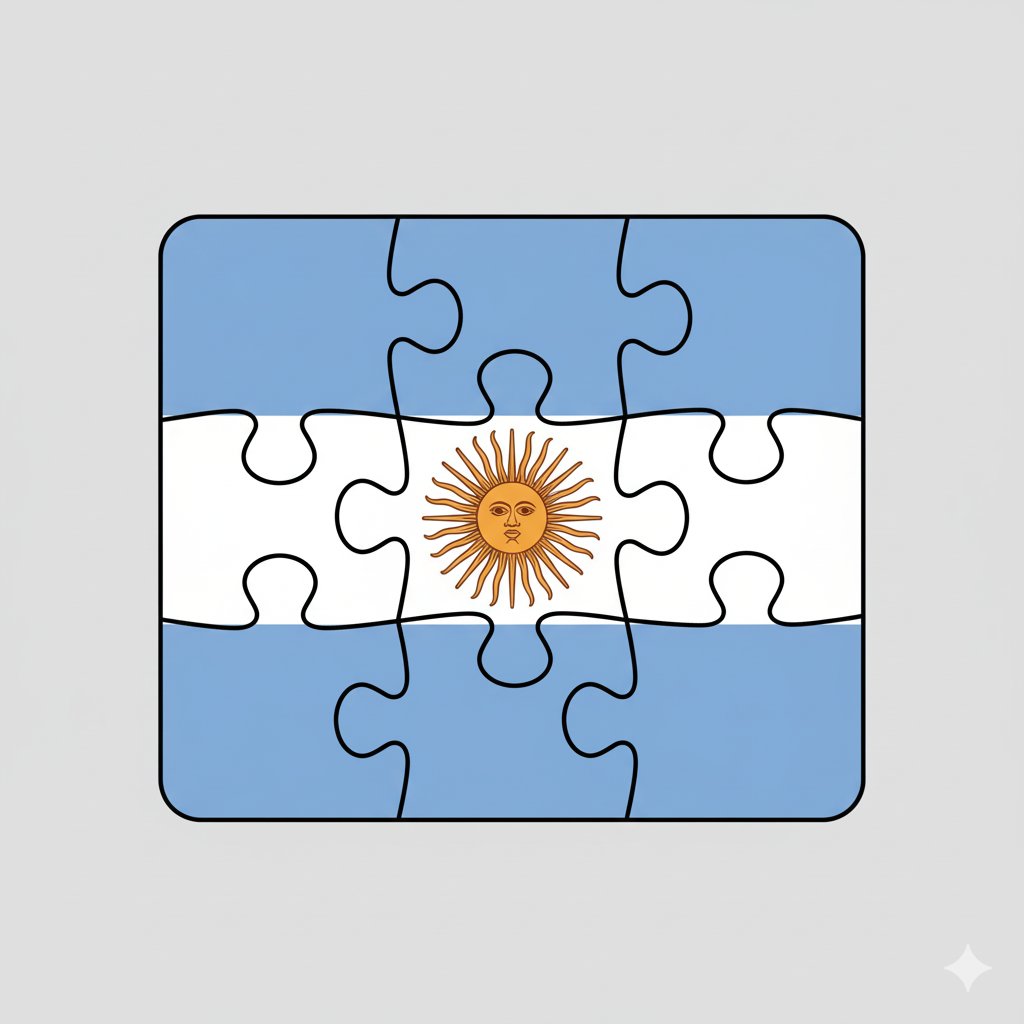

7. Juego implementando One-shot prompting modelo Texto-Texto

In [8]:
prompt_completo = """
Ejemplo de Prompt:
rompecabezas, ganamos piezas al responder correctamente una pregunta realizada por la seño.
---

Prompt Principal:
Crea un juego para afianzar conocimientos, el tema seria: historia de la creación de la bandera Argentina (quien la creo, en que año se creo, que significan sus colores, porque se eligieron esos colores) para niños de 8 años. Genera la consigna y las 9 preguntas, en base a los temas detallados, para usar en el juego.
"""

juego_generado = generar_respuesta(prompt=prompt_completo)

print("---------------------------------")
print("El juego generado es:")
print(juego_generado)
print("---------------------------------")

---------------------------------
El juego generado es:
## ¡Arma la Bandera Argentina! Un Juego de Rompecabezas

**Consigna:**  ¡Vamos a armar la bandera argentina! Pero para conseguir las piezas del rompecabezas, ¡debemos responder correctamente las preguntas sobre su historia! Por cada respuesta correcta, ganaremos una pieza. ¡El primero en completar su bandera gana!

**Material:**  Un rompecabezas de la bandera argentina dividido en 9 piezas (o una imagen impresa en 9 partes).

**Preguntas:**

1. **¿Quién diseñó la bandera argentina que conocemos hoy?** (Respuesta: Manuel Belgrano)
2. **¿En qué año se creó por primera vez la bandera argentina?** (Respuesta: 1812)
3. **¿Qué color es la franja del medio de la bandera argentina?** (Respuesta: Blanco)
4. **¿Qué color es la franja de arriba y la de abajo de la bandera argentina?** (Respuesta: Celeste)
5. **¿Qué representa el color celeste en la bandera argentina?** (Respuesta:  El cielo de Argentina, la pureza, la lealtad o el color del 

8. Instalamos libreria para utilizar el modelo texto-voz

In [39]:
!pip install elevenlabs pydub

9. Función y Ejemplo para modelo Texto -Voz

In [4]:
from elevenlabs import ElevenLabs, VoiceSettings
from IPython.display import Audio
import time


api_key=os.getenv("ELEVEN"),
client = ElevenLabs(api_key=api_key)


voice_id = "AZnzlk1XvdvUeBnXmlld"
voice_settings = VoiceSettings(
    stability=0.8,
    similarity_boost=0.5,
    style=0.2,
    use_speaker_boost=True
)


fragmentos = [
    "¡Hola, amiguitos y amiguitas de todo el país! Soy Patria, y hoy vamos a viajar en el tiempo para descubrir un secreto fascinante de nuestra querida Argentina.",
    
    "Imagínense que hace muchísimos años, cuando todavía no existían los celulares, ¡Argentina estaba viviendo un momento de mucho revuelo! La gente quería ser libre y tomar sus propias decisiones.",
    
    "Un día, en la ciudad de Paraná, había un señor muy importante: el General Manuel Belgrano. Pensó y pensó: '¡Necesitamos algo que nos identifique! Algo que nos haga sentir que somos un solo equipo, una gran familia, la familia argentina'.",
    
    "Belgrano miró al cielo azul y a las nubes blancas y suaves que viajan por el cielo. Se le encendió la lamparita, como cuando a mí se me ocurre una idea para una nueva aventura. Dijo: '¡Ya sé! Nuestra bandera tendrá los colores del cielo y de las nubes!'",
    
    "Así que, el 27 de febrero de 1812, en Rosario, Belgrano hizo que sus soldados juraran fidelidad a una bandera con dos franjas celestes y una blanca en el medio. ¡Fue un momento super emocionante! ¡Imagínense a todos los soldados gritando y saltando de alegría!",
    
    "Primero la bandera no tenía sol, pero luego agregaron el Sol de Mayo en el medio, brillante y orgulloso. Así nació nuestra hermosa bandera argentina, símbolo de valentía, libertad y orgullo. Cada vez que vean el cielo azul y las nubes blancas, ¡piensen en nuestra bandera y en el General Belgrano!"
]


audios = []
for i, frag in enumerate(fragmentos):
    nombre_archivo = f"historia_bandera_parte_{i+1}.mp3"
    
  
    audio_gen = client.text_to_speech.convert(
        voice_id=voice_id,
        text=frag,
        voice_settings=voice_settings,
        model_id="eleven_multilingual_v2"
    )
    

    audio_bytes = b"".join(audio_gen)
    

    with open(nombre_archivo, "wb") as f:
        f.write(audio_bytes)
    
    audios.append(Audio(filename=nombre_archivo))
    print(f"✅ Guardado y listo: {nombre_archivo}")
    time.sleep(1)  



print("\n🎧 Para reproducir un fragmento, usa: audios[0], audios[1], ... hasta audios[6]")
print("💡 Sugerencia: hacer una pausa después de cada fragmento para preguntas o comentarios de los niños.")


✅ Guardado y listo: historia_bandera_parte_1.mp3
✅ Guardado y listo: historia_bandera_parte_2.mp3
✅ Guardado y listo: historia_bandera_parte_3.mp3
✅ Guardado y listo: historia_bandera_parte_4.mp3
✅ Guardado y listo: historia_bandera_parte_5.mp3
✅ Guardado y listo: historia_bandera_parte_6.mp3

🎧 Para reproducir un fragmento, usa: audios[0], audios[1], ... hasta audios[6]
💡 Sugerencia: hacer una pausa después de cada fragmento para preguntas o comentarios de los niños.


10. Reproducción de los Audios generados 

In [5]:
from IPython.display import display

for i, audio in enumerate(audios):
    print(f"🎵 Fragmento {i+1}:")
    display(audio)


🎵 Fragmento 1:


🎵 Fragmento 2:


🎵 Fragmento 3:


🎵 Fragmento 4:


🎵 Fragmento 5:


🎵 Fragmento 6:
